<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/Financial-Engineering/blob/master/Extending_financial_services_to_poor_people_around_the_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction:
[Kiva.org](https://www.kiva.org/) is an online crowdfunding platform extending financial services to poor people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

<center>
<img src="https://i.imgur.com/2G8C53X.png" width="500"><br/>
</center>

Kiva reaches some of the most remote places in the world through their global network of "Field Partners". These partners are local organizations working in communities to vet borrowers, provide services, and administer loans.

In this exercise, you'll investigate Kiva loans in the Philippines.  Can you identify regions that might be outside of Kiva's current network, in order to identify opportunities for recruiting new Field Partners?

To get started, we run the code cell below to set up our feedback system.

In [0]:
import geopandas as gpd

### 1) Get the data.

Use the next cell to load the shapefile located at `loans_filepath` to create a GeoDataFrame 

In [0]:
loans_filepath = "../input/geospatial-learn-course-data/kiva_loans/kiva_loans/kiva_loans.shp"

#Load the data
world_loans = gpd.read_file(loans_filepath)

### 2) Plot the data.

Run the next code cell without changes to load a GeoDataFrame `world` containing country boundaries.



```
pop_est 	continent 	name 	iso_a3 	gdp_md_est 	geometry
0 	920938 	Oceania 	Fiji 	FJI 	8374.0 	(POLYGON ((180 -16.06713266364245, 180 -16.555...
1 	53950935 	Africa 	Tanzania 	TZA 	150600.0 	POLYGON ((33.90371119710453 -0.950000000000000...
2 	603253 	Africa 	W. Sahara 	ESH 	906.5 	POLYGON ((-8.665589565454809 27.65642588959236...
3 	35623680 	North America 	Canada 	CAN 	1674000.0 	(POLYGON ((-122.84 49.00000000000011, -122.974...
4 	326625791 	North America 	United States of America 	USA 	18560000.0 	(POLYGON ((-122.84 49.00000000000011, -120 49....
```



Use the `world` and `world_loans` GeoDataFrames to visualize Kiva loan locations across the world.

In [0]:
ax = world.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=2)

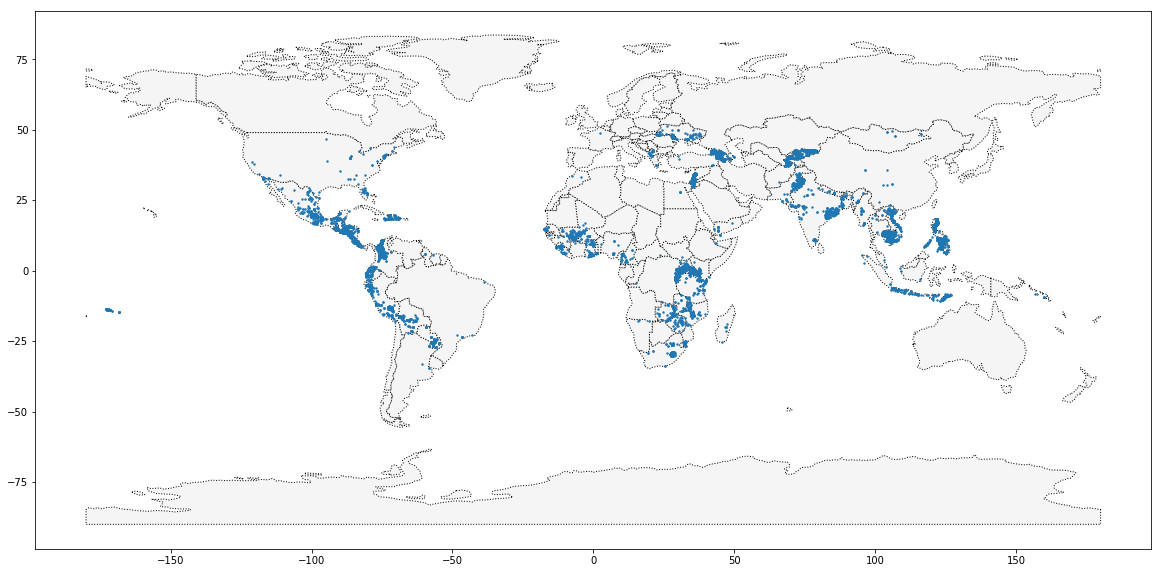

### 3) Select loans based in the Philippines.

Next, you'll focus on loans that are based in the Philippines.  Use the next code cell to create a GeoDataFrame `PHL_loans` which contains all rows from `world_loans` with loans that are based in the Philippines.

In [0]:
PHL_loans = world_loans.loc[world_loans.country=="Philippines"].copy()

### 4) Understand loans in the Philippines.

Run the next code cell without changes to load a GeoDataFrame `PHL` containing boundaries for all islands in the Philippines.

In [0]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("../input/geospatial-learn-course-data/Philippines_AL258.kml", driver='KML')
PHL.head()



```
Name 	Description 	geometry
0 	Autonomous Region in Muslim Mindanao 		(POLYGON ((119.4668994 4.5871841, 119.4665294 ...
1 	Bicol Region 		(POLYGON ((124.0457659 11.5786226, 124.0459356...
2 	Cagayan Valley 		(POLYGON ((122.5158059 17.0443554, 122.515675 ...
3 	Calabarzon 		(POLYGON ((120.4920249 14.0540312, 120.4920145...
4 	Caraga 		(POLYGON ((126.4540073 8.243998599999999, 126....
```



Use the `PHL` and `PHL_loans` GeoDataFrames to visualize loans in the Philippines.

In [0]:
ax = PHL.plot(figsize=(12,12), color='whitesmoke', linestyle=':', edgecolor='lightgray')
PHL_loans.plot(ax=ax, markersize=2)

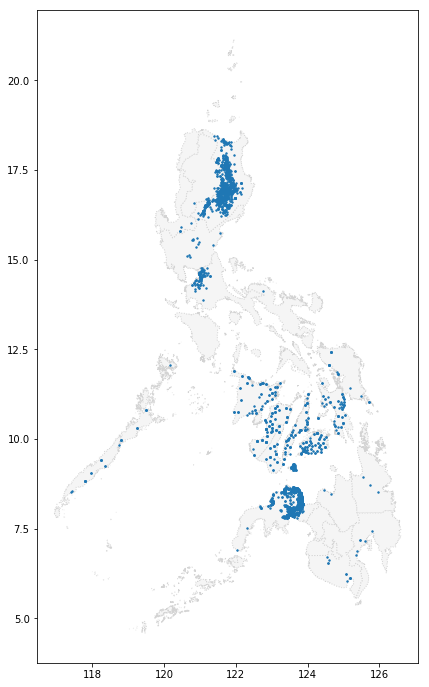

Can you identify any islands where it might be useful to recruit new Field Partners?  Do any islands currently look outside of Kiva's reach?

You might find [this map](https://bit.ly/2U2G7x7) useful to answer the question.

There are a number of potential islands, but Mindoro (in the central part of the Philippines) stands out as a relatively large island without any loans in the current dataset. This island is potentially a good location for recruiting new Field Partners!